In [1]:
'''
    Titulo: Como a mobilidade urbana se relaciona com o aumento de numero de casos de covid.


'''


import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import warnings
import os
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# %matplotlib notebook

In [2]:


# path = os.path.dirname(os.path.abspath(__file__))


'''
    Peguei essa primeira parte desse site: https://www.viralml.com/video-content.html?v=A6nWZKZpL3k
'''
# Se demorar mto pra carregar o csv, baixa o csv e descomenta essa linha (ps: ta com o \\ do windows)
# gmr_df = pd.read_csv(path+'\\Global_Mobility_Report.csv')  
gmr_df = pd.read_csv('https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv')
gmr_df.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


In [3]:
# Categories available
categories_google_mobility = ['retail_and_recreation_percent_change_from_baseline',
 'grocery_and_pharmacy_percent_change_from_baseline',
 'parks_percent_change_from_baseline',
 'transit_stations_percent_change_from_baseline',
 'workplaces_percent_change_from_baseline',
 'residential_percent_change_from_baseline']
categories_google_mobility

regions_list_BR = [ 'Federal District', ' State of Acre','State of Alagoas','State of Amapá', 'State of Amazonas', 
                    'State of Bahia', 'State of Ceará', 'State of Espírito Santo', 'State of Goiás',
                    'State of Maranhão', 'State of Mato Grosso', 'State of Mato Grosso do Sul', 'State of Minas Gerais',
                    'State of Pará', 'State of Paraíba', 'State of Paraná', 'State of Pernambuco', 'State of Piauí', 
                    'State of Rio de Janeiro', 'State of Rio Grande do Norte',
                    'State of Rio Grande do Sul', 'State of Rondônia', 'State of Roraima', 'State of Santa Catarina', 
                    'State of São Paulo', 'State of Sergipe', 'State of Tocantins'
                  ]

regions_abbr_BR = [ 'DF','AC','AL','AP','AM','BA','CE','ES','GO','MA','MT','MS','MG','PA',
                    'PB','PR','PE','PI','RJ','RN','RS','RO','RR','SC','SP','SE','TO']


{'State of São Paulo':         country_region_code country_region        sub_region_1 sub_region_2  \
1330235                  BR         Brazil  State of São Paulo          NaN   
1330236                  BR         Brazil  State of São Paulo          NaN   
1330237                  BR         Brazil  State of São Paulo          NaN   
1330238                  BR         Brazil  State of São Paulo          NaN   
1330239                  BR         Brazil  State of São Paulo          NaN   
...                     ...            ...                 ...          ...   
1330746                  BR         Brazil  State of São Paulo          NaN   
1330747                  BR         Brazil  State of São Paulo          NaN   
1330748                  BR         Brazil  State of São Paulo          NaN   
1330749                  BR         Brazil  State of São Paulo          NaN   
1330750                  BR         Brazil  State of São Paulo          NaN   

        metro_area iso_3166_

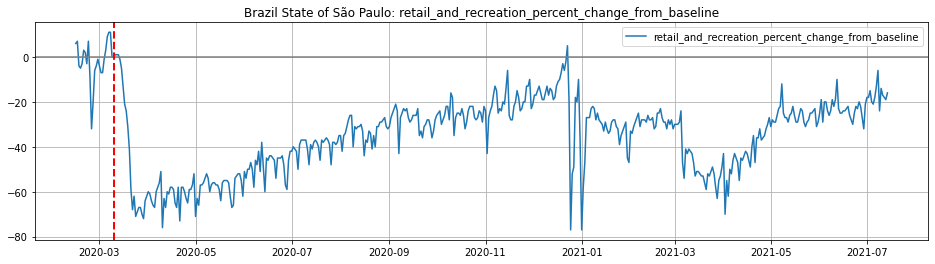

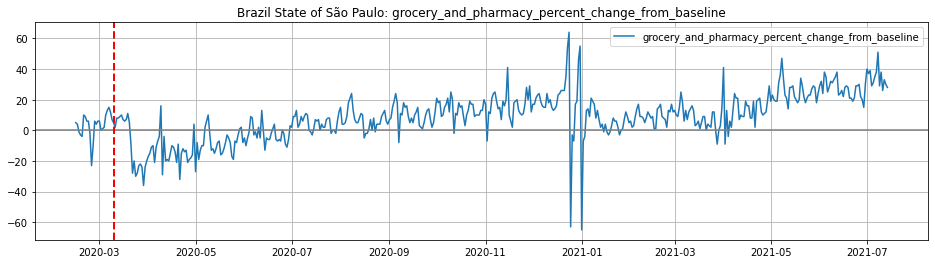

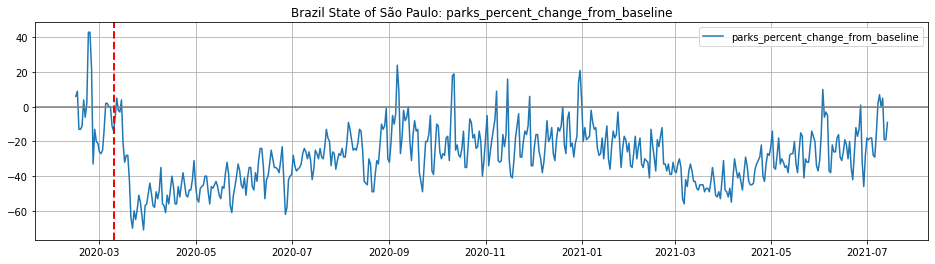

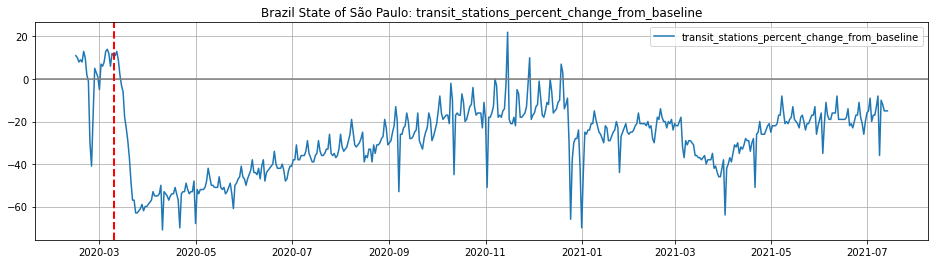

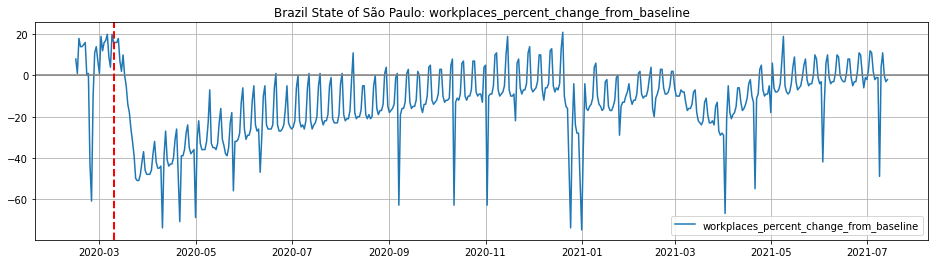

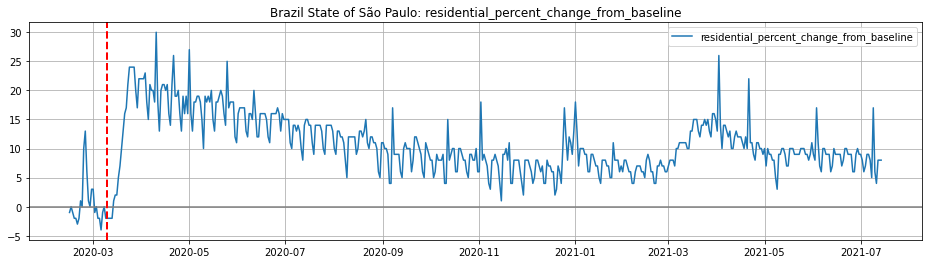

In [4]:
def getAllRegionsGroups(regions_list=regions_list_BR, country="Brazil"):
    regions_dict = {}
#     print(regions_list)
    for r in regions_list:
        sub_df = gmr_df[(gmr_df['country_region']== country) & (gmr_df['sub_region_1']==r) & (pd.isnull(gmr_df['sub_region_2']))]
        sub_df.loc[:,'date'] = pd.to_datetime(sub_df.loc[:,'date'])
        sub_df = sub_df.sort_values('date', ascending=True)
        regions_dict[r]=sub_df
#     print(regions_dict)
    return regions_dict


def plotGroups(sub_df, region, country="Brazil"):
    # let's plot all time series for this region
    for group in categories_google_mobility:
#         print(group)
        
        fig, ax = plt.subplots(figsize=(16, 4))
        plt.plot(sub_df['date'], sub_df[group], label=group)
        ax.axhline(y=0, color='gray')
        ax.axvline(pd.to_datetime('2020-03-10'), color='r', linestyle='--', lw=2)
        plt.title(country + ' '+ region + ': ' + group)
        plt.legend(loc='best') 
        plt.grid()
        plt.show()
        # plt.savefig(fname=path+'\\'+group+'.png', format='png')


# - - - - - - - -  TESTE - - - - - - - -  
sdf = getAllRegionsGroups(regions_list=['State of São Paulo'])   #, 'State of Rio de Janeiro'
print(sdf)
plotGroups(sdf['State of São Paulo'], 'State of São Paulo')
# plotGroups(sdf['State of Rio de Janeiro'], 'State of RIO')

In [5]:
# - - - - - - - -  CASOS DE COVID - - - - - - - -  
covid_df = pd.read_csv('https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv')
col = [ 'epi_week', 'date', 'country', 'state', 'city', 'newDeaths', 'deaths', 'newCases', 'totalCases', 
        'deathsMS', 'totalCasesMS', 'deaths_per_100k_inhabitants', 'totalCases_per_100k_inhabitants', 
        'deaths_by_totalCases', 
        'recovered', 'suspects', 'tests', 'tests_per_100k_inhabitants', 'vaccinated', 
        'vaccinated_per_100_inhabitants', 'vaccinated_second', 
        'vaccinated_second_per_100_inhabitants', 'vaccinated_single', 'vaccinated_single_per_100_inhabitants']

print(covid_df.head)

def getAllRegionsCovid(regions_list=regions_list_BR, regions_abbr=regions_abbr_BR,
                       country="Brazil"):
    regions_dict = {}
    
#     print(regions_list)
    for r in range(len(regions_list)):
        sub_df = covid_df[(covid_df['state']== regions_abbr[r])]
        sub_df.loc[:,'date'] = pd.to_datetime(sub_df.loc[:,'date'])
        sub_df = sub_df.sort_values('date', ascending=True)
        regions_dict[regions_list[r]]=sub_df
#     print(regions_dict)
    return regions_dict


    

<bound method NDFrame.head of        epi_week        date country  state   city  newDeaths  deaths  \
0             9  2020-02-25  Brazil     SP  TOTAL          0       0   
1             9  2020-02-25  Brazil  TOTAL  TOTAL          0       0   
2             9  2020-02-26  Brazil     SP  TOTAL          0       0   
3             9  2020-02-26  Brazil  TOTAL  TOTAL          0       0   
4             9  2020-02-27  Brazil     SP  TOTAL          0       0   
...         ...         ...     ...    ...    ...        ...     ...   
13785       128  2021-07-17  Brazil     SC  TOTAL          0   17520   
13786       128  2021-07-17  Brazil     SE  TOTAL          0    5853   
13787       128  2021-07-17  Brazil     SP  TOTAL          0  134320   
13788       128  2021-07-17  Brazil     TO  TOTAL          0    3386   
13789       128  2021-07-17  Brazil  TOTAL  TOTAL          0  540683   

       newCases  totalCases  deathsMS  ...   recovered   suspects       tests  \
0             1         

In [6]:
regions_selected = [regions_list_BR[i] for i in [24,25]]
regions_selected_abbr = [regions_abbr_BR[i] for i in [24,25]]

print(regions_selected_abbr)

cases_df = getAllRegionsCovid(regions_selected, regions_selected_abbr)
newCases = cases_df[regions_selected[0]]['newCases'].values
covid_dates = cases_df[regions_selected[0]]['date'].values

mob_df = getAllRegionsGroups(regions_list=regions_selected)
mob_dates = mob_df[regions_selected[0]]['date'].values
mob_dates += np.timedelta64(7,'D') # com offset de 7 dias

scaler = MinMaxScaler(feature_range=(-1,1))
newCases_norm = newCases/np.max(newCases)

mobility_norm = scaler.fit_transform(mob_df[regions_selected[0]][categories_google_mobility].values)
print(newCases)

['SP', 'SE']
[    1     0     0     1     0     0     0     0     1     3     4     3
     3     0     3    11    16    10     9    71    16    12    77    45
   110    63   172   114    65    52   191   170   183    45    66   822
   642   525   542   418   154   246   816  1026   772   736   203   336
   140   476  1672   525  1273  1053   373   313   805   529   826  1086
  2178   711   981  2345  2117  2540  1676   800   598   415  1866  3800
  2075  1902  2581  1033   687  1588  3378  3189  4092  2805  1162   721
  2929  3864  3880  3132  3687  1603  1464  2392  3466  6382  5691  5586
  2556  1598  6999  5188  5717  5365  5984  2524  1520  5545  6178  6204
  5380  4975  5327  3258  8825  1232  1111 19030  4135  3392  2788  7502
  9347  9765  9921  7073  6156  3408  6235  8555 12244  8523  1828  7649
  2891  9638  8657  8350  9395  7780  5107  2610 12000  6569  8872  5367
  4612  3022  1385  6235 16777 12561 11211 16263  4501  3672 12647 13896
 14809 13298 10014  6367  1533 15371  

retail_and_recreation_percent_change_from_baseline


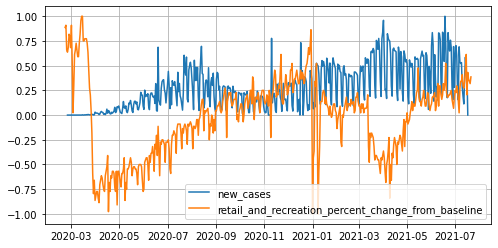

grocery_and_pharmacy_percent_change_from_baseline


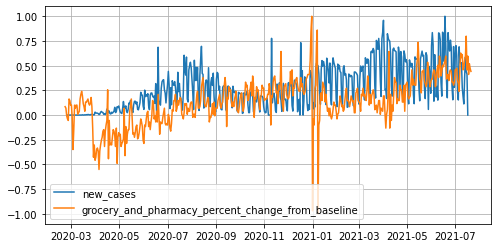

parks_percent_change_from_baseline


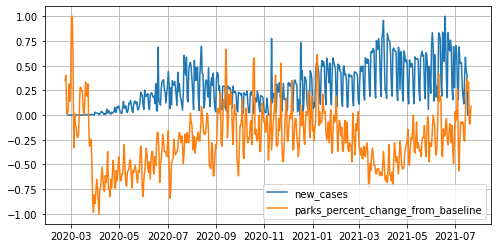

transit_stations_percent_change_from_baseline


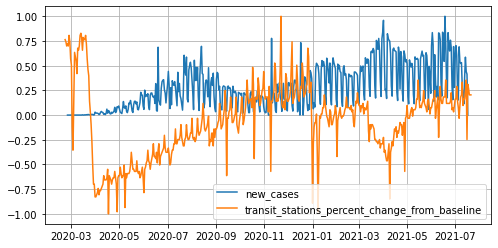

workplaces_percent_change_from_baseline


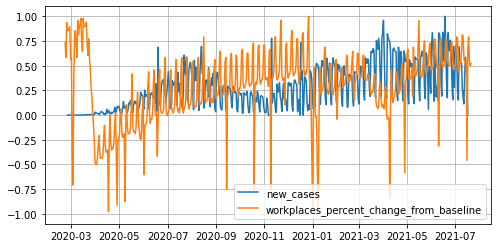

residential_percent_change_from_baseline


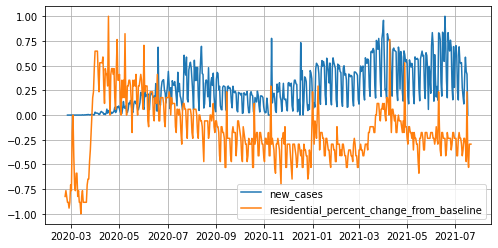

In [7]:
i = 0
for group in categories_google_mobility:
    print(group)
    group_values = mobility_norm[:,i]
    fig, ax = plt.subplots(figsize=(8, 4))
    plt.plot(covid_dates[:], newCases_norm[:], label="new_cases")
    plt.plot(mob_dates[:], group_values[:], label=group)
   
    plt.legend(loc='best') 
    plt.grid()
    plt.show()
    
    i+=1

retail_and_recreation_percent_change_from_baseline


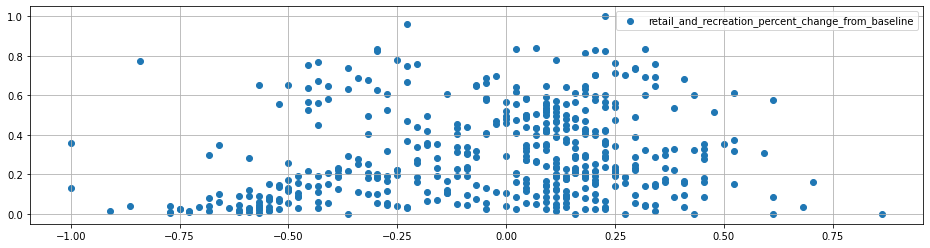

grocery_and_pharmacy_percent_change_from_baseline


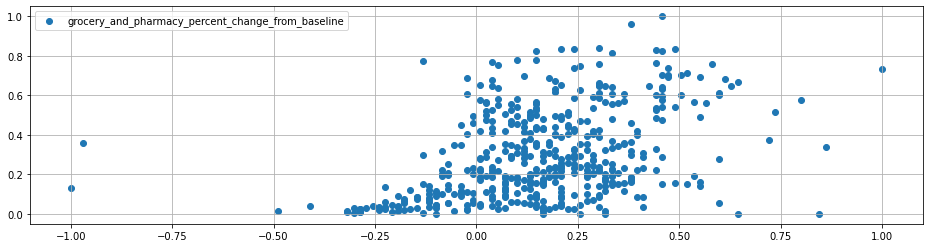

parks_percent_change_from_baseline


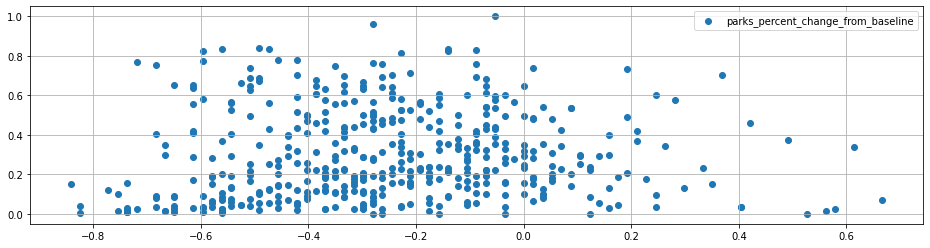

transit_stations_percent_change_from_baseline


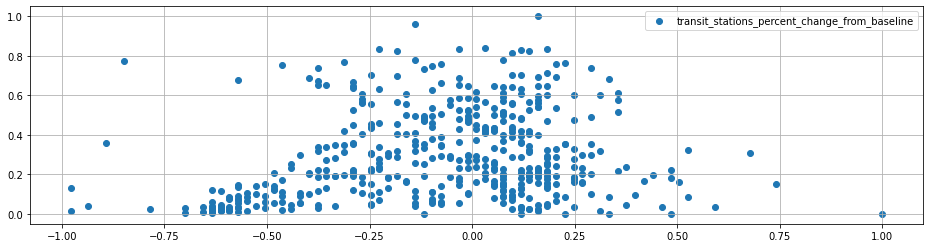

workplaces_percent_change_from_baseline


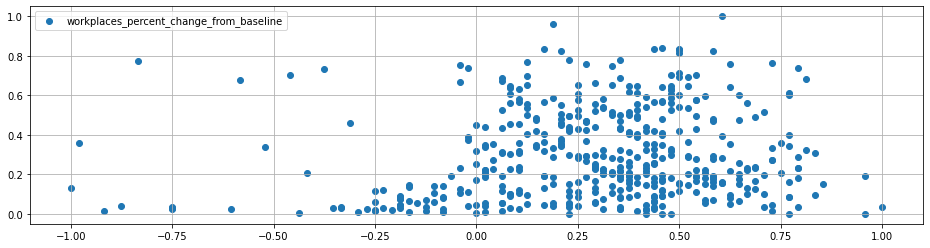

residential_percent_change_from_baseline


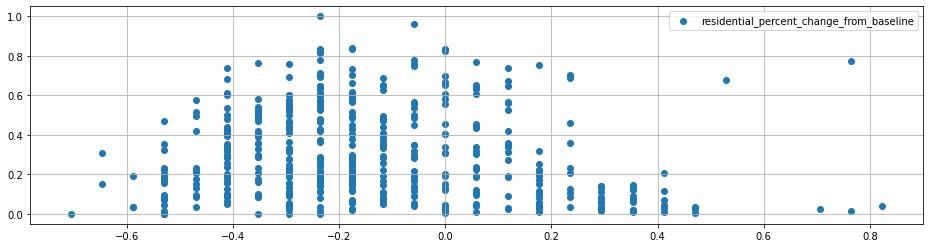

In [8]:
i = 0
for group in categories_google_mobility:
    print(group)
    group_values = mobility_norm[:,i]
    fig, ax = plt.subplots(figsize=(16, 4))
    plt.scatter(group_values[-460:], newCases_norm[-470:-10], label=group) #com offset de 7 dias
#     plt.scatter(group_values[-460:], newCases_norm[-463:-3], label=group) #sem offset de 7 dias 
   
    plt.legend(loc='best') 
    plt.grid()
    plt.show()
    
    i+=1

In [9]:
from keras.models import Sequential
from keras.layers import Dense

X = mobility_norm[-460:,:]
Y = newCases_norm[-470:-10]
Y = Y.reshape((len(Y),1))

print("Mobility Features")
print(X[:5])
print("X shape: ",X.shape)


print("Covid Cases")
print(Y[:5])
print("Y shape: ",Y.shape)



Mobility Features
[[-0.68181818 -0.05426357 -0.75438596 -0.61290323 -0.25        0.29411765]
 [-0.77272727 -0.30232558 -0.8245614  -0.6344086   0.          0.        ]
 [-0.61363636 -0.28682171 -0.64912281 -0.65591398 -0.29166667  0.41176471]
 [-0.63636364 -0.30232558 -0.73684211 -0.69892473 -0.35416667  0.47058824]
 [-0.56818182 -0.2248062  -0.59649123 -0.65591398 -0.33333333  0.47058824]]
X shape:  (460, 6)
Covid Cases
[[0.01508698]
 [0.00555836]
 [0.00887894]
 [0.0294521 ]
 [0.03703169]]
Y shape:  (460, 1)


In [10]:
model = Sequential()
model.add(Dense(6, input_dim=6, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='relu'))

In [11]:


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X, Y, epochs=700, batch_size=90)



Epoch 1/700
6/6 [==============================] - 8s 997us/step - loss: 0.6758 - accuracy: 0.0104
Epoch 2/700
6/6 [==============================] - 0s 983us/step - loss: 0.6340 - accuracy: 0.0061
Epoch 3/700
6/6 [==============================] - 0s 991us/step - loss: 0.6293 - accuracy: 0.0068
Epoch 4/700
6/6 [==============================] - 0s 855us/step - loss: 0.6313 - accuracy: 0.0084
Epoch 5/700
6/6 [==============================] - 0s 780us/step - loss: 0.6305 - accuracy: 0.0059
Epoch 6/700
6/6 [==============================] - 0s 817us/step - loss: 0.6231 - accuracy: 0.0109
Epoch 7/700
6/6 [==============================] - 0s 990us/step - loss: 0.6130 - accuracy: 0.0075
Epoch 8/700
6/6 [==============================] - 0s 798us/step - loss: 0.6124 - accuracy: 0.0056
Epoch 9/700
6/6 [==============================] - 0s 803us/step - loss: 0.6057 - accuracy: 0.0072
Epoch 10/700
6/6 [==============================] - 0s 834us/step - loss: 0.6095 - accuracy: 0.0113
Epoch 11/

6/6 [==============================] - 0s 803us/step - loss: 0.5639 - accuracy: 0.0062
Epoch 84/700
6/6 [==============================] - 0s 798us/step - loss: 0.5712 - accuracy: 0.0074
Epoch 85/700
6/6 [==============================] - 0s 914us/step - loss: 0.5662 - accuracy: 0.0149
Epoch 86/700
6/6 [==============================] - 0s 798us/step - loss: 0.5611 - accuracy: 0.0133
Epoch 87/700
6/6 [==============================] - 0s 798us/step - loss: 0.5600 - accuracy: 0.0136
Epoch 88/700
6/6 [==============================] - 0s 798us/step - loss: 0.5599 - accuracy: 0.0154
Epoch 89/700
6/6 [==============================] - 0s 997us/step - loss: 0.5665 - accuracy: 0.0105
Epoch 90/700
6/6 [==============================] - 0s 896us/step - loss: 0.5503 - accuracy: 0.0165
Epoch 91/700
6/6 [==============================] - 0s 805us/step - loss: 0.5584 - accuracy: 0.0137
Epoch 92/700
6/6 [==============================] - 0s 903us/step - loss: 0.5620 - accuracy: 0.0152
Epoch 93/700


6/6 [==============================] - 0s 937us/step - loss: 0.5425 - accuracy: 0.0130
Epoch 165/700
6/6 [==============================] - 0s 980us/step - loss: 0.5559 - accuracy: 0.0190
Epoch 166/700
6/6 [==============================] - 0s 803us/step - loss: 0.5541 - accuracy: 0.0187
Epoch 167/700
6/6 [==============================] - 0s 803us/step - loss: 0.5508 - accuracy: 0.0179
Epoch 168/700
6/6 [==============================] - 0s 885us/step - loss: 0.5520 - accuracy: 0.0166
Epoch 169/700
6/6 [==============================] - 0s 734us/step - loss: 0.5578 - accuracy: 0.0152
Epoch 170/700
6/6 [==============================] - 0s 992us/step - loss: 0.5471 - accuracy: 0.0078
Epoch 171/700
6/6 [==============================] - 0s 798us/step - loss: 0.5414 - accuracy: 0.0157
Epoch 172/700
6/6 [==============================] - 0s 805us/step - loss: 0.5566 - accuracy: 0.0138
Epoch 173/700
6/6 [==============================] - 0s 997us/step - loss: 0.5543 - accuracy: 0.0149
Epoc

6/6 [==============================] - 0s 803us/step - loss: 0.5516 - accuracy: 0.0145
Epoch 246/700
6/6 [==============================] - 0s 804us/step - loss: 0.5490 - accuracy: 0.0126
Epoch 247/700
6/6 [==============================] - 0s 798us/step - loss: 0.5520 - accuracy: 0.0134
Epoch 248/700
6/6 [==============================] - 0s 797us/step - loss: 0.5543 - accuracy: 0.0153
Epoch 249/700
6/6 [==============================] - 0s 992us/step - loss: 0.5499 - accuracy: 0.0205
Epoch 250/700
6/6 [==============================] - 0s 906us/step - loss: 0.5496 - accuracy: 0.0202
Epoch 251/700
6/6 [==============================] - 0s 988us/step - loss: 0.5474 - accuracy: 0.0110
Epoch 252/700
6/6 [==============================] - 0s 790us/step - loss: 0.5490 - accuracy: 0.0105
Epoch 253/700
6/6 [==============================] - 0s 950us/step - loss: 0.5544 - accuracy: 0.0141
Epoch 254/700
6/6 [==============================] - 0s 827us/step - loss: 0.5500 - accuracy: 0.0187
Epoc

6/6 [==============================] - 0s 798us/step - loss: 0.5525 - accuracy: 0.0157
Epoch 326/700
6/6 [==============================] - 0s 1ms/step - loss: 0.5464 - accuracy: 0.0197
Epoch 327/700
6/6 [==============================] - 0s 719us/step - loss: 0.5493 - accuracy: 0.0121
Epoch 328/700
6/6 [==============================] - 0s 798us/step - loss: 0.5476 - accuracy: 0.0137
Epoch 329/700
6/6 [==============================] - 0s 791us/step - loss: 0.5467 - accuracy: 0.0109
Epoch 330/700
6/6 [==============================] - 0s 885us/step - loss: 0.5466 - accuracy: 0.0097
Epoch 331/700
6/6 [==============================] - 0s 997us/step - loss: 0.5398 - accuracy: 0.0142
Epoch 332/700
6/6 [==============================] - 0s 791us/step - loss: 0.5449 - accuracy: 0.0170
Epoch 333/700
6/6 [==============================] - 0s 798us/step - loss: 0.5447 - accuracy: 0.0152
Epoch 334/700
6/6 [==============================] - 0s 798us/step - loss: 0.5401 - accuracy: 0.0140
Epoch 

6/6 [==============================] - 0s 867us/step - loss: 0.5387 - accuracy: 0.0109
Epoch 407/700
6/6 [==============================] - 0s 990us/step - loss: 0.5483 - accuracy: 0.0145
Epoch 408/700
6/6 [==============================] - 0s 798us/step - loss: 0.5474 - accuracy: 0.0110
Epoch 409/700
6/6 [==============================] - 0s 798us/step - loss: 0.5458 - accuracy: 0.0173
Epoch 410/700
6/6 [==============================] - 0s 798us/step - loss: 0.5487 - accuracy: 0.0195
Epoch 411/700
6/6 [==============================] - 0s 1ms/step - loss: 0.5429 - accuracy: 0.0187
Epoch 412/700
6/6 [==============================] - 0s 997us/step - loss: 0.5457 - accuracy: 0.0150
Epoch 413/700
6/6 [==============================] - 0s 703us/step - loss: 0.5465 - accuracy: 0.0133
Epoch 414/700
6/6 [==============================] - 0s 798us/step - loss: 0.5454 - accuracy: 0.0137
Epoch 415/700
6/6 [==============================] - 0s 810us/step - loss: 0.5368 - accuracy: 0.0181
Epoch 

6/6 [==============================] - 0s 998us/step - loss: 0.5351 - accuracy: 0.0162
Epoch 488/700
6/6 [==============================] - 0s 798us/step - loss: 0.5379 - accuracy: 0.0129
Epoch 489/700
6/6 [==============================] - 0s 887us/step - loss: 0.5392 - accuracy: 0.0118
Epoch 490/700
6/6 [==============================] - 0s 798us/step - loss: 0.5413 - accuracy: 0.0141
Epoch 491/700
6/6 [==============================] - 0s 798us/step - loss: 0.5484 - accuracy: 0.0121
Epoch 492/700
6/6 [==============================] - 0s 729us/step - loss: 0.5408 - accuracy: 0.0158
Epoch 493/700
6/6 [==============================] - 0s 797us/step - loss: 0.5473 - accuracy: 0.0178
Epoch 494/700
6/6 [==============================] - 0s 992us/step - loss: 0.5374 - accuracy: 0.0190
Epoch 495/700
6/6 [==============================] - 0s 884us/step - loss: 0.5302 - accuracy: 0.0131
Epoch 496/700
6/6 [==============================] - 0s 741us/step - loss: 0.5437 - accuracy: 0.0187
Epoc

6/6 [==============================] - 0s 808us/step - loss: 0.5456 - accuracy: 0.0104
Epoch 568/700
6/6 [==============================] - 0s 824us/step - loss: 0.5389 - accuracy: 0.0175
Epoch 569/700
6/6 [==============================] - 0s 997us/step - loss: 0.5478 - accuracy: 0.0181
Epoch 570/700
6/6 [==============================] - 0s 798us/step - loss: 0.5476 - accuracy: 0.0141
Epoch 571/700
6/6 [==============================] - 0s 798us/step - loss: 0.5398 - accuracy: 0.0157
Epoch 572/700
6/6 [==============================] - 0s 798us/step - loss: 0.5423 - accuracy: 0.0135
Epoch 573/700
6/6 [==============================] - 0s 798us/step - loss: 0.5297 - accuracy: 0.0220
Epoch 574/700
6/6 [==============================] - 0s 811us/step - loss: 0.5465 - accuracy: 0.0133
Epoch 575/700
6/6 [==============================] - 0s 792us/step - loss: 0.5401 - accuracy: 0.0154
Epoch 576/700
6/6 [==============================] - 0s 798us/step - loss: 0.5464 - accuracy: 0.0120
Epoc

6/6 [==============================] - 0s 803us/step - loss: 0.5322 - accuracy: 0.0181
Epoch 649/700
6/6 [==============================] - 0s 798us/step - loss: 0.5345 - accuracy: 0.0117
Epoch 650/700
6/6 [==============================] - 0s 1ms/step - loss: 0.5333 - accuracy: 0.0145
Epoch 651/700
6/6 [==============================] - 0s 1ms/step - loss: 0.5442 - accuracy: 0.0179
Epoch 652/700
6/6 [==============================] - 0s 880us/step - loss: 0.5288 - accuracy: 0.0189
Epoch 653/700
6/6 [==============================] - 0s 997us/step - loss: 0.5308 - accuracy: 0.0170
Epoch 654/700
6/6 [==============================] - 0s 798us/step - loss: 0.5315 - accuracy: 0.0194
Epoch 655/700
6/6 [==============================] - 0s 1ms/step - loss: 0.5415 - accuracy: 0.0219
Epoch 656/700
6/6 [==============================] - 0s 997us/step - loss: 0.5306 - accuracy: 0.0120
Epoch 657/700
6/6 [==============================] - 0s 798us/step - loss: 0.5402 - accuracy: 0.0149
Epoch 658/

In [12]:
model.output_shape

(None, 1)

In [13]:
# evaluate the keras model
_, accuracy = model.evaluate(X, Y)
print('Accuracy: %.2f' % (accuracy*100))

15/15 [==============================] - 0s 646us/step - loss: 0.5372 - accuracy: 0.0152
Accuracy: 1.52


In [14]:
newCases = cases_df[regions_selected[1]]['newCases'].values
newCases_norm = newCases/np.max(newCases)
mobility_norm = scaler.fit_transform(mob_df[regions_selected[1]][categories_google_mobility].values)

In [15]:
X_test = mobility_norm[-460:,:]
Y_test = newCases_norm[-470:-10]
Y_test = Y_test.reshape((len(Y_test),1))

print("Mobility Features")
print(X_test[:5])
print("X_test shape: ",X_test.shape)


print("Covid Cases")
print(Y_test[:5])
print("Y_test shape: ",Y_test.shape)

_, accuracY_test = model.evaluate(X_test, Y_test)
print('AccuracY_test: %.2f' % (accuracY_test*100))

Mobility Features
[[-0.50588235 -0.17557252 -0.78823529 -0.77391304 -0.3592233   0.36363636]
 [-0.71764706 -0.32824427 -0.83529412 -0.91304348 -0.06796117  0.18181818]
 [-0.43529412 -0.3129771  -0.64705882 -0.72173913 -0.51456311  0.54545455]
 [-0.41176471 -0.3129771  -0.63529412 -0.72173913 -0.47572816  0.54545455]
 [-0.41176471 -0.3129771  -0.56470588 -0.75652174 -0.47572816  0.54545455]]
X_test shape:  (460, 6)
Covid Cases
[[0.0019253 ]
 [0.        ]
 [0.        ]
 [0.00154024]
 [0.00115518]]
Y_test shape:  (460, 1)
15/15 [==============================] - 0s 570us/step - loss: 0.7167 - accuracy: 0.0087
AccuracY_test: 0.87


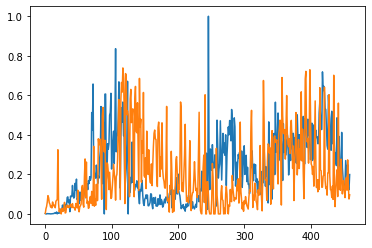

In [16]:
predict = model.predict(X_test)
plt.plot(Y_test)
plt.plot(predict)
plt.show()